**What should be in here in terms of theory:**
- ~~LCDM model and its parameters; This is our starting/reference point and for simplicity we will take the univese to be flat.~~ 
- ~~Matter power spectrum, P(k, z)~~
- Neutrinos, Neff and the effect on the matter power spectrum [Particle Data Group, Zyla, P., Barnett, R. M., Beringer, J., Dahl, O., Dwyer, D. A., ... & Pomarol, A. (2020). Review of particle physics. Progress of Theoretical and Experimental Physics, 2020(8), 083C01.](https://academic.oup.com/ptep/article/2020/8/083C01/5891211)


# The universe in consideration:
We will be considering the universe in which the main constituents are, dark energy (DE), cold dark matter (CDM), baryons, neutrinos and photons. We describe all these constituents by a dimensionless density parameter $\Omega_{i}$, wich by definition tells us the "density fraction" of the of this component compared to the total density nowadays:

$$\Omega_{i} = \frac{\rho_{i, 0}}{\rho_{crit, 0}}$$

for component $i$ and $\rho_{crit, 0} = \frac{3H_{0}^{2}}{8\pi G}$ the total energy density of the universe today denonted by the subscript 0 (with $a(t_{0}) = 1$ and thus at present day $t = t_{0}$), defined throught the current value of the Hubbel parameter: $H_{0}$(following the first Friedmann equation). The dimensionless parameters obey a normalization condition given by the fact that $\rho_{crit, 0}$ is the total energy density content of the universe today:

$$1 = \sum_{i} \Omega_{i} = \Omega_{\Lambda} + \Omega_{m}+ \Omega_{r}+ \Omega_{k}$$ 

Depending on which elements we choose to describe and how we treat these elements of our universe, we will define the cosmologiical model that we consider. For this research, we are not so much interested in the newest possible ways of discribing dark energy, so we stick to a model in which it is a constant, the $\Lambda CDM$ model (more specifically, the DE-equation of state: $\omega_{\Lambda} = -1$ ). The $\Lambda CDM$ model happens to describe the current universe rather well following the observations and thus makes for a starting point and reference model for this research. The '$\Lambda$' stands for the constant dark energy which is the main component in the universe at current day; $\Omega_{\Lambda} \approx 0.68$. The 'CDM' stands for Cold Dark matter (cold, because it doesn't show much dynamics/motion and is rahter clumbed together) that forms the second biggest constituent; $\Omega_{c} \approx 0.27$.

However, this does not yet clear up all the paramters shown above. In order:
- Matter $\left(\Omega_{m} \approx 0.32 \right)$, which consists of (ordinary) baryonic matter $\left(\Omega_{b} \approx 0.045 \right)$ and (cold) dark matter $\left(\Omega_{c}\right)$
- Radiation $\left(\Omega_{r} \approx 9.4 x 10^{-4} \right)$, which is often disregarded as a variable, since we can observe this from the Cosmic Microwave Background (CMB) temperature ($T_{CMB}$), through: $\rho_{r} = \frac{\pi^{2}}{30}g_{\star}(T) T_{CMB}^{4}$, with $g_{\star}$ the number of relativistic degrees of freedom of photons.
Within the radiation density, we do consider both photons $\left(\Omega_{\gamma}\right)$ and relativistic neutrinos $\left(\Omega_{\nu}\right)$ as components.
- Curvature $\left( |\Omega_{k}| \leq 0.01 \right)$. However, we will be concerned with a flat universe, in which $\left(\Omega_{k} = 0\right)$. Eventhough a completely flat universe is unstable, from observations we see that our universe is nearly flat such that we can use this as a starting point in our $\Lambda CDM$ model.

### Parameters of the model
Mostly, 6 or 7 parameters are considered to be apart of the formulation of the $\Lambda CDM$ model.
First, there are the main ernergy density components of the universe: $\Omega_{\Lambda}, \Omega_{c}$ & $\Omega_{b}$. Note that we leave out the dimensionless density parameter of radiation, for the reason mentioned above. This is not directly related to the magnitude of the parameter, although this is significantly smaller than the others, we will see later that this parameter has a clearly visible effect on the shape of the matter power spectrum. Also, like we mentioned above, we set the curvature to zero: $\Omega_{k} = 0$, to consider a flat universe and disregard $\Omega_{k}$ as a parameter.
Then there is the Hubble parameter $\left(H = \frac{\dot{a}}{a}\right)$, discribing the expansion rate of the universe through the scale factor $\left(a(t)\right)$ from the FRW metric **[$\todo{Weinberg/Baumann, chapter 1, REF to section/appendix}$]()**. In general, this parameter is often combined with the density parameters above to make $\Omega_{i} h^{2}$ (with $h \propto H$, called the *reduced* hubble parameter), representing the proper physical density fraction of the universe today(in units of $8\pi G$ $100$ km/s/Mpc), rahter than a theoretical dimensionless parameter. When written in this form, the density parameters refer more directly to the first Friedmann equation in the form:

$$ \frac{H^{2}}{H_{0}^{2}} = \Omega_{m} a^{-3}+ \Omega_{r} a^{-4}+ \Omega_{k} a^{-2} + \Omega_{\Lambda}$$

**[Is it confusing that I take all the density parameters here again, after reasoning that we leave the radiation and curvatire out?]()**

**[$\todo{Weinberg/Baumann, chapter 1, REF to section/appendix}$]()** with $H_{0}$ the value of the Hubble paramter at current day.

The fifth parameter is $A_{s}$, the amplitude of primoridal perturbations. Unlike the dimensionless density parameters, $A_{s}$ is not defined at current day but more so in the very early universe, since it is defined as the amplitude of the fluctuations generated during the preiod of inflation. This parameter is (almost) scale invariant and therefore causes an increase or decrease of the spectrum amplitude on all scales.
Next up, we have the spectral index of scalar perturbations ($n_{s}$) which gives information about the scaling of perturbations depending on the scale of these perturbations. Accompanied by $k_{p}$ the pivot scale, that indicates the scale at which the scaling of theses perturbations flips.  **[$\todo{The spectral index depends on the inflation potential?? REF?}$]()**
A note to make for the last two parameters is that they are both defined for scalar perturbations, which is what we will mostly look at. Also, if we take the spectral index $n_{s} = 1$, then the aplitude $A_{s}$ is completely scale invariant.

Sometimes the optical depth is included. This parameter is related to reionization, that happened in between the time of last scattering and current day **[$\todo{Dodelson, expand?}$]()** 

We will however expand the parameter space of the conventional $\Lambda CDM$ model by including neutrino parameters. There will be two main neutrino parameters that we will be looking at:
- $N_{eff}$ is the effective number of active neutrino species and currently has a value of $N_{eff} = 3.046$ **[$\todo{Reference to neutrino section}$]()**. This is strongly related to the masses of the neutrinos and will be used to determine the number of active relativistic neutrinos $N_{\nu, rel}$:

    $$N_{\nu, rel} = N_{eff} - \left(\frac{T_{\nu}^{eff}}{T_{CMB}} \right)^{4} \left(\frac{4}{11} \right)^{-\frac{4}{3}} N_{\nu, mass}$$

    With $T_{\nu}^{eff}$ the currently measured effective temperature of massive neutrinos, $T_{CMB}$ the observed temperature of the cosmic microwave background. This is the fromulation used in **[CCL](https://arxiv.org/abs/1812.05995)** and can be obtained from **[Eq. 26.1: Neutrinos in cosmology](https://academic.oup.com/ptep/article/2020/8/083C01/5891211)**. **[$\todo{Show this ro refer to actual equation somewhere}$]()**
- $m_{\nu}$, the neutrino mass(es).
Where we will look at the combined or individual masses of the active neutrinos in multiple different hierarchies. To our knowledge, there are 3 neutrino species. In terms of mass, we only know the relative mass difference between species but not the specific masses of the species themselves. Because of this, we are also not really sure abou the mass ordering of the species. The two current contenders are called 'the normal hierarchy' and 'the inverted hierarchy'. Due to our lack of knowledge about the indivudual masses of the neutrino species, the sum of neutrino masses $\left( \sum_{i} m_{\nu, i}\right)$ is also not accurately known, but currently constrained within the range $\sum_{i} m_{\nu, i} \in (0.06, 0.22)$ eV. This range will be used later in this notebook. In the ideal case, we could find the mass of the lightest neutrino, such that we can determine all the individual masses **[$\todo{Reference to neutrino section}$]()**.

After specifying neutrino masses, we determine the number of active massive neutrinos. A neutrino is considered to be massive and non relativistic if: $m_{\nu} > 0.00017$ eV. Given the number of massive neutrinos, $N_{eff} = 3.046$ and the observed temperatures $T_{\nu}^{eff}$ & $T_{CMB}$, we can determine the number of active relativistic neutrino species.

Now that we have set up the model and introduced the parameters used to vary and control the cosmology, we can turn to how they really affect the cosmology we observe. To do this we wil first look at the matter power spectrum, and afterwards at the angular power spectrum. The latter will be reserved for another notebook.


# (Exploring) the matter power spectrum, P(k, z)

**[M. Gerbino and M. Lattanzi. Status of neutrino properties and future prospects—cosmological and astrophysical constraints. Frontiers in Physics, 5, Feb. 2018.](https://arxiv.org/abs/1712.07109)**

A big aspect of the formation of large scale structure (LSS) in the universe, is the clustering of matter. Starting from (quantum) fluctuations in the early universe that evolve into this large scale structure, we look at (tiny) deviations($\delta_{\rho}$) away from the homogeneous desnity fields. Where $\delta_{\rho} = \frac{\delta \rho}{\rho}$ is the deimensionless density contrast.**[TODO: Super/sub horizon modes]()**
The evolution of these perturbations is described through the transfer function $T(k, z)$: $$\Delta_{m, k}(z) = T(k, z) \delta_{m, k},$$ **[TODO: Dodelson, chapter 8]()** where $\delta_{m, k}$ is the Fourier transform of the promordial perturbation and $\Delta_{m, k} (z)$ the resulting perturbation at a redshift $z$ in Fourierspace, for the corresponding mode $k$. However, these perturbations by themselves do not carry much information. For such a single value of the peprturbation, we have: $$\langle\Delta_{m, k} (z)\rangle = 0,$$ where the angular brackets denote the spatial average of the (small) perturbation at some redshift. It is the correlations between these perturbations that can tell us something about the clustering of matter in the universe: 

$$\langle\Delta_{m, \vec{k}}(z) \Delta_{m, \vec{k}^{'}}(z)\rangle = (2\pi)^{3} \delta^{3}(\vec{k} - \vec{k}^{'}) P(k, z)$$
with $P(k, z)$ the matter power spectrum. This spectrum shows us the typical correlations of matter perturbations on corresponding scales $k$, in other words: $P(k, z)$ tells us the typical clustering of matter on some scale $k$, this applies to regions of scale $k$ everyhwere in the universe. The matter power spectrum is defined for a specific redshift $z$. If we look at the matter power spectrum at the time of last scattering($z_{ls}$), we can relate the correlations between matter fluctuations to the anisotropies in the CMB, thus giving us a link between theory and observations**[$\todo{Is this necessarily true??}$]()**.

**[Scaling of the matter power spectrum in the linear and non linear regime; Baumnann sect 5.1.3](https://physics.bu.edu/~schmaltz/PY555/baumann_notes.pdf)**
| ![alt text](./../Outputs/Setup_results/P_k_insight_no_non_lin_regimes.png) |
|:--:|

This plot shows the matter power spectrum $P(k, z)$. More specifically, both the linear matter power spectrum(black solid line) and the non-linear matter power spectrum(red dasched line) are shown as a function of the wavenumber k. The wavenumber $k$ corresponds to the scale of perturbations through: $k = \frac{2\pi}{\lambda}$, where $\lambda$ is the wavelength/scale of the perturbation. Note: the scaling with the wavenumber $k$ is inverse to the scale $\lambda$ of the perturbations, a low value of $k$ corresponds to large scales.
The difference between the two matter power spectra is the inclusion or exclusion of non-linear contributions to the matter power spectrum. The linear matter power spectrum only contains the linear behavior and contributions, while the non-linearities are also included in the case of the non-linear matter power spectrum.

Taking a closer look at the plot of $P(k, z)$, there are a few key characteristics to highlight.
- The peak of the matter power spectrum corresponds to the scale of perturbations that entered the horizon $\todo{explain the 'horizon'}$ at the time of matter-radiation equality. At matter radiation equality, the universe shifts from being radiation dominated to being matter dominated. This is represented by the blue dotted line corresponding to the scale of these modes($k_{eq}$). Smaller values of $k$ correspond to modes that entered the horizon during matter domination, while larger values of $k$ correspond to the modes that enter the horizon during radiation domination.
- For smaller k (large scales) the matter power spectrum scales linearly with $k$, $P(k, z) \propto k$. This part is called the linear regime of the matter power spectrum, in this plot indicated for: $k < k_{lin}$.
- For $k > k_{non-lin}$, the modes for wavenumbers larger that the red dotted line, we find ourselves in the non-linear regime. This is the section of the matter power spectrum where we see a significant difference between the linear and non-linear matter power spectrum $\todo{What is the difference between the two? Are the non-lineariities eliminated from the linear matter power spectrum?}$, as the non-linear matter power spectrum is enhanced for the smaller scales. It is worth mentioning that we rely on numerical N-body simulations for the the solutions of these (smaller) scales in the non-linear regime. These simulations offer us the solutions in the non-linear regime but they do carry large uncertainties. It is because of this lack of accuracy that it is common to define a cut-off scale ($k_{cutt}$) above which we disregard the matter power spectrum.
- In between the peak of the matter power spectrum and $k_{non-lin}$, we have a range of scales considered to make up the quasi-linear regime. It is within this range that we see oscillations in the matter power spectrum. These oscillations are baryon acoustic oscillations (BAO). They originate from the baryon-photon plasma, where the coupling between the baryon perturbations and photons shows acoustic oscillations. These oscillations have a distinct frequency which allows us to use the baryno acoustic oscillations as a so-called standard ruler. Through the measurement of the angular diameter distance ($d_{A}$) of their wavelength we can measure the Hubble expansion rate, but this is not considered to be of importance to this research.

Sometimes the difference between the different regimes is simplified by stating:
- $k < k_{eq}$ corresponds to the linear regime
- $k > k_{eq}$ corresponds to the non-linear regime

The scaling of the matter power spectrum can be explained through the Poisson equation **[Cosmology, Baunmann: section 5.1.3](https://physics.bu.edu/~schmaltz/PY555/baumann_notes.pdf)**. Is we consider the gravitational potential $\left(\Phi\right)$ that originates from a (slight) matter overdensity ($\bar{\rho}_{m}\Delta_{m}$), the Poisson equation would be wirtten as:

$$\nabla^{2}\Phi = 8\pi Ga^{2}\bar{\rho}_{m}\Delta_{m}$$

$\Delta_{m}$ is the comoving density contrast. If we would now consider the effect of a perturbation in the gravitaional potential ($\Delta_{\Phi}$) and plug it's Fourier transform into the Poisson equation above, ee would obtain:

$$k^{2}\Delta_{\Phi} = 8\pi Ga^{2}\bar{\rho}_{m}\Delta_{m}$$

and thus a scaling of $P_{m}(k) \propto k^{4} P_{\Phi} (k)$ for the matter power spectrum in terms of the gravitational potential power spectrum $\left(P_{\Phi}\right)$. There are two main areas in which the scaling of the matter power spectrum is significantly different: the linear and non-linear regime.
The linear regime ($k < k_{eq}$) corresponds to the perturbations that crossed the horizon durning the matter dominated era. During matter domination the power spectrum of the gravitational potential takes on the scale-invariant form: $P_{\Phi}(k) \propto k^{-3}$ $\todo{scale invariance?}$, such that $P_{m}(k) \propto k^{4} k^{-3} = k$.
For the non-linear regime, the modes of these scales ($k > k_{eq}$) enter the horizon during radiation domination. In this regime, the suppression of the modes is dependent on the total time the modes spent inside the horizon. The condition for the horizon crossing is given by: $\frac{k}{a} = H$ and thus  can be given as $k = \dot{a} = \frac{1}{\eta}$ or $k\eta = 1$. Modes of larger $k$ cross the horizon at earlier times and spent more time inside the horizon and will be fruther suppressed, according to a factor $\left(\frac{k}{k_{eq}}\right)^{2}$. The gravitational potential itself decays with $\Phi \propto a^{-2} \propto \eta^{-2}$ such that we get: $P_{m}(k) \propto k^{4} k^{-3} \left(k^{-2}\right)^{2} = k^{-3}$ which shows as a descending line in a logarithmic plot. $\todo{work this out better, where do the gravitational potential scalings come from? How about the conformal time?}$

In the ideal case, we can observe $P(k, z_{ls})$ but this is rarely possible.The observations of the matter power spectrum come from the visible matter fraction of the universe and therefore does not give us a complete picture. One such probe is a galaxy survey. This generates a matter power spectrum based on how the visible matter(galaxies in this case) is clustered, such that the observed matter power spectrum is biased towards visible matter and thus should be treated as such: $P_{g}(k, z)$. To obtain the theoretical prediction of the matter power spectrum we must account for these biases: $P(k, z) = b^{2}(k, z) P_{g}(k, z)$. We can observe and measure the angular power spectrum $\left(C_{l}\right)$,  which is one of our main cosmological probes and can be related to the matter power spectrum **[$\todo{see notebook #2}$]()**.

In terms of theory, our model parameters directly directly affect the matter power spectrum, thus giving even more power to these cosmological probes. Eventhough we are mainly interested in the neutrino parameters for this research, there is a reason for looking at the perturbations of all the components of the universe. (even more so since the effect of these perturabtions are not necessarily unique for each component).
What we will focus on next is the effect of the parameters of the (extended) $\Lambda CDM$ model. We will visualize the changes within the ranges of priors drawn from the literature and explain the changes according to the underlying cosmology.

## Effect of parameters on P(k, z)

To investigate the effect of the parameters on the matter power spectrum we make use of the Core Cosmology Library ([CCL](https://iopscience.iop.org/article/10.3847/1538-4365/ab1658/meta)). 
We will produce one plot in which all parameters, of the $\Lambda CDM$ model, are varied within the range of known priors(presented in Planck and DES papers). Such a plot will contain about 6 to 7 subplots. We will make these subplots for different values of the reddshift(z). Since we have to specify the scalefactor ($a$) in CCL, we find the corresponding scalefactor through: $a (t) = \frac{1}{1+z}$ such that we get the following, for the values:
- $z = 0 --> a = 1$
- $z = 0.5 --> a = 0.667$
- $z = 1 --> a = 0.5$
- $z = 1.5 --> a = 0.4$

The main idea is to develope an intuition for the effect of the $ \Lambda CDM$ parameters on the matter power spectrum. [Ref: CCLX examples - Matter power spectrum](https://github.com/LSSTDESC/CCLX/blob/master/Power%20spectrum%20example.ipynb)

### Priors on our parameters
The variations within eacht parameter is done within the range of the following priors:
- $\Omega_{CDM} \left(\Omega_{c}\right) \quad \in \quad \left(0.1, 0.9\right)$
- $\Omega_{b} \quad \in \quad \left(0.03, 0.07\right)$
- $h \left(H_{0}\right) \quad \in \quad \left(55, 91\right) \quad \left[ kms^{-1}Mpc^{-1}\right]$
- $A_{s} \quad \in \quad \left(0.5e-9, 5.0e-9\right)$
- $n_{s} \quad \in \quad \left(0.87, 1.07\right)$
- $N_{eff} \quad \in \quad \left(0.044, 6.044\right)$. Note that this is correlated with the parameters below, we can best define the masses of the neutrinos or its sum. From this info, and $N_{eff}$, the number of relativistic neutrinos is determined.
- $\sum m_{\nu}$ $\quad \in \quad \left(0, 1\right) \quad \left[eV\right]$
- $\Omega_{\nu} \quad \in \quad \left(6.0, 64.4\right) \quad \left[10^{-4}h^{2}\right]$
- $\omega_{\Lambda} \quad \in \quad \left(-2.0, -0.33\right)$, but this will mainly be fixed at $\omega_{\Lambda} = -1$

These priors are taken from the following papers:
- **Planck:**
    - [Ade, P. A., Aghanim, N., Armitage-Caplan, C., Arnaud, M., Ashdown, M., Atrio-Barandela, F., ... & Mazzotta, P. (2014). Planck 2013 results. XV. CMB power spectra and likelihood. Astronomy & Astrophysics, 571, A15.](https://arxiv.org/abs/1303.5075) found in *Table 5*
    - [Ade, P. A., Aghanim, N., Arnaud, M., Ashdown, M., Aumont, J., Baccigalupi, C., ... & Matarrese, S. (2016). Planck 2015 results-xiii. cosmological parameters. Astronomy & Astrophysics, 594, A13.](https://arxiv.org/abs/1303.5076), looking at *Table I*
    - [Chen, L., Huang, Q. G., & Wang, K. (2019). Distance priors from Planck final release. Journal of Cosmology and Astroparticle Physics, 2019(02), 028.](https://arxiv.org/abs/1808.05724), Appendix A describes the priors quasi-crypticly
- **Dark Energy Surveay (DES):**
    - [Abbott, T. M. C., Acevedo, M., Adamow, M., Aguena, M., Alarcon, A., Allam, S., ... & DES Collaboration. (2025). Dark Energy Survey: implications for cosmological expansion models from the final DES Baryon Acoustic Oscillation and Supernova data. arXiv preprint arXiv:2503.06712.](https://arxiv.org/pdf/2503.06712) given the priors of *Table I* (NOTE: we could also refer to the constraints in *Table V*)
    - [Krause, E., Fang, X., Pandey, S., Secco, L. F., Alves, O., Huang, H., ... & Weller, J. (2021). Dark energy survey year 3 results: Multi-probe modeling strategy and validation. arXiv preprint arXiv:2105.13548.](https://arxiv.org/pdf/2105.13548) given the priors from *Table II*


In [11]:
# First of all, for good order, import all the necessary packacges, as suggested by the CCLX examples and common sense:

# The Core Cosmology Library:
import pyccl as ccl

# The conventional tools to deal with our results:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm
import matplotlib.colors as mcolors
import math

### Priors and Loop functions
The cell below contains some definitions that are used throughout the whole (or most of the) notebook.
We collect the priors here first, these are the values we found above. We use start with 10 different values of eacht parameter, to make sure that the comptations do not take extremely long. This can ofcourse be adjusted along the way.

Because the cosmology in CCL is not mutable, we must redefine the cosmology each time we vary a parameter and calculate the matter power spectrum for that variation. 
To make the following cells more independent, we define two functions, in which we calculate the (non) linear matter power spectrum for a set of variations in one of the parameters of the $\Lambda CDM$ model. 
Over each loop, we insert another variation of a certain variable into a "temporary" cosmology, for which we then calculate the (non) linear matter power spectrum. This calculated matter power spectrum is then stored and later returned, such that these functions output a set of matter power spectra in which each spectrum is calculated for a different variation of a certain variable. This sets us up well for a plot.

In [12]:
# Let us define the priors we found and defined above:
om_c_prior = np.geomspace(0.1, 0.9, 10)
om_b_prior = np.geomspace(0.03, 0.07, 10)
h_prior = np.geomspace(0.55, 0.91, 10)
a_s_prior = np.geomspace(0.5e-9, 5.0e-9, 10)
n_s_prior = np.geomspace(0.87, 1.07, 10)
n_eff_prior = np.geomspace(0.046, 6.046, 10)
de_prior = np.geomspace(-3, -0.33, 10) # We might or might not make use of this

# Combine into one list of all priors, for plotting purposes:
priors = [om_c_prior, om_b_prior, h_prior, a_s_prior, n_s_prior, n_eff_prior]

# Starting for the linear matter power spectrum, which we calculate with ccl.linear_matter_power():
def loop_comso_lin(list, parameter, list_m_nu=None, mass_split=None): # "List" is an expected list of possible parameter values, "parameter": the parameter we want to vary, expected entry the 
                                     # the string naming the parameter
    
    # Define empty arrays in which we will put the resulting powerspectra for a certain parameter we vary.
    power_spectra_lin = [] # This is the output list we will plot from, in this array we gather all different
    
    # The vanilla LCDM values, in a dictionary. NOTE: The fact that we enter the parameters as a dictionary is key
    global pars # Here we have a reference list of the (global) parameters. This will be altered slightly in the loop.

    # If we do specify a certain mass_split, with a specific list of neutrino masses:
    if list_m_nu is not None:
        pars[r"m_nu"] = list_m_nu
    if mass_split is not None:
        pars[r"mass_split"] = mass_split

    for i in range(len(list)): # For each value of the parameter we want to plot, we calculate a new cosmology and P(k, z)
        # Note that we cannot just vary the list of neutrino masses in the same manner as the other parameters:
        if mass_split is not None:
            pars[parameter] = [0, list[i], list[i]]
        else:
            pars[parameter] = list[i] # Vary the parameter given
        
        # Initiate the cosmology with the adjusted parameter, we want to plot the (linear) matter power spectrum from this. 
        cosmo_i = ccl.Cosmology(**pars) # give a dictionary of parameters, which we "unpack" using '**'
        # print(cosmo_i) # To check the implementation of the extra parameter: "camb": {"halofit_version": "mead2020_feedback"}

        # Calculate the (linear) matter power spectrum and add it to the list we will be returning.
        p_k_lin_i = ccl.linear_matter_power(cosmo_i, k, a) # k, a speficied in the cells in which the function is called, thus are both global
        power_spectra_lin.append(p_k_lin_i)
        
        # Reset the parameters to their initial value (vanilla LCDM)
        pars = {r"Omega_c": 0.27, r"Omega_b": 0.045, r"h": 0.67, r"A_s": 2.1e-9, r"n_s": 0.96, r"extra_parameters": {"camb": {"halofit_version": "mead2020_feedback"}}}
        # NOTE: We added the extra parameter to check the neutrino sensitivity of the HMCode2020: r"extra_parameters": {"camb": {"halofit_version": "mead2020_feedback"}}

    return (power_spectra_lin)


# Eventhough it's not our main interest, let us take a look at the non-linear matter power spectrum too, with a similar setup:
def loop_comso_non_lin(list, parameter, list_m_nu=None, mass_split=None): # "List", the list parameter values, "parameter": the parameter we want to vary as str
    
    # Define return list:
    power_spectra_non_lin = []
    
    # Vanilla LCDM dictionary:
    global pars

    # If we do specify a certain mass_split, with a specific list of neutrino masses:
    if list_m_nu is not None:
        pars[r"m_nu"] = list_m_nu
    if mass_split is not None:
        pars[r"mass_split"] = mass_split

    for i in range(len(list)): # Loop for each value of the parameter
        # Note that we cannot just vary the list of neutrino masses in the same manner as the other parameters:
        if mass_split is not None:
            pars[parameter] = [0, list[i], list[i]]
        else:
            pars[parameter] = list[i] # Vary the parameter given
        
        # Temporary cosmology with the adjusted parameter: 
        cosmo_i = ccl.Cosmology(**pars) # given a dictionary of parameters, we "unpack" using '**'
        # print(cosmo_i) # To check the implementation of the extra parameter: "camb": {"halofit_version": "mead2020_feedback"}

        # Calculate the non-linear matter power spectrum and add it to the list we will be returning.
        p_k_non_lin_i = ccl.nonlin_matter_power(cosmo_i, k, a)
        power_spectra_non_lin.append(p_k_non_lin_i)
        
        # Reset the parameters to their initial value
        pars = {r"Omega_c": 0.27, r"Omega_b": 0.045, r"h": 0.67, r"A_s": 2.1e-9, r"n_s": 0.96, r"extra_parameters": {"camb": {"halofit_version": "mead2020_feedback"}}}
        # NOTE: We added the extra parameter to check the neutrino sensitivity of the HMCode2020: r"extra_parameters": {"camb": {"halofit_version": "mead2020_feedback"}}

    return (power_spectra_non_lin)


## Linear matter power spectra:
With all the set-up behind us, we can nnow turn to showing the variations in the matter power spectrum by changing the parameters of the $\Lambda CDM$ model. We start by looking at our main interest, the linear matter power spectrum. Later on we will also look at the non-linear matter power spectrum as a side track. The difference between the two is that the linear matter power spectrum disregards all the non-linearities that are included in the non-linear matter power spectrum (**[CCL](https://ccl.readthedocs.io/en/master/source/notation_and_other_cosmological_conventions.html)**). As mentioned above, it is common to define a cut-off in the non-linear regime for the matter power spectrum at small scales due to large uncertainties originating from the results of N-body simulations. So we stick mainly with the linear matter power spectrum.

We set up the plot to work for a single vaue of $a$, so we must change this and re-run the cell to obtain the different plots for each redshift we are intersted in.
In essence we can put all the code into one cell, however: we choose to treat each redshift in itself, this is mainly for overview purposes.

/var/folders/lk/qr_shnj17csc45hj2xy2j2rh0000gn/T/ipykernel_4877/654331515.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


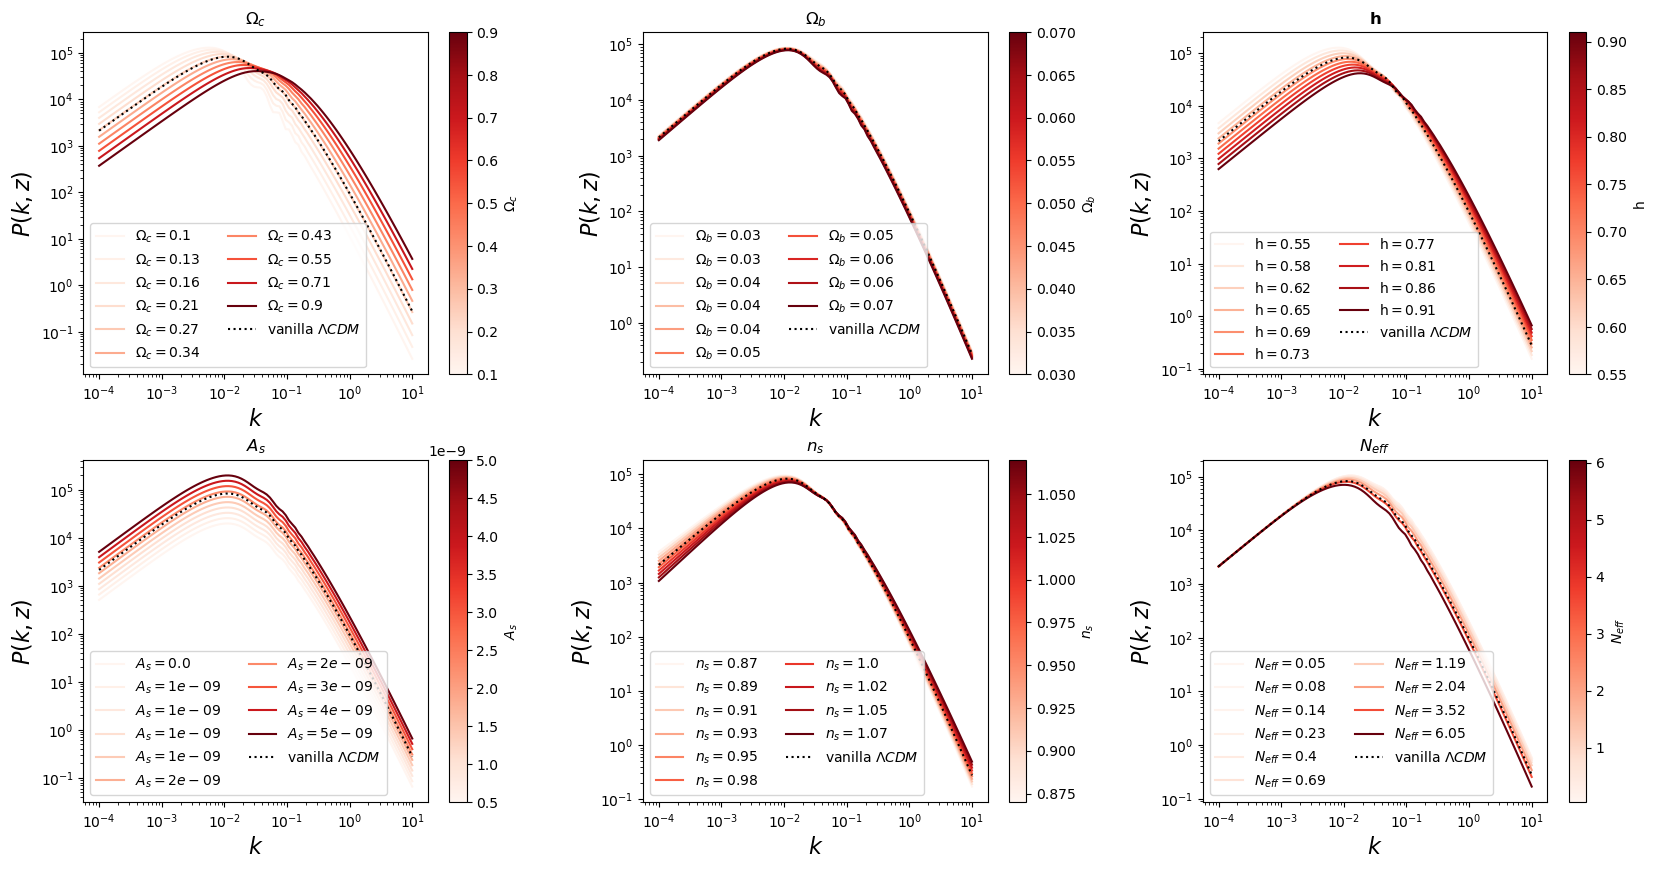

In [15]:
"""
# First result, taking symmetric variations around the vanilla LCDM parameters
om_c_prior = [0.13, 0.20, 0.27, 0.34, 0.41] # these are random; just a trial. The deviations might be too large
om_b_prior = [0.005, 0.025, 0.045, 0.065, 0.085]
h_prior = [0.55, 0.62, 0.67, 0.72, 0.77]
a_s_prior = [1.05e-9, 1.505e-9, 2.1e-9, 3.2e-9, 4.2e-9]
n_s_prior = [0.88, 0.92, 0.96, 1, 1.04]
n_eff_prior = [0.044, 1.544, 3.044, 4.544, 6.044]
"""

# To plot the spectrum against the wavenumber:
kmin, kmax, nk = 1e-4, 1e1, 100
k = np.geomspace(kmin, kmax, nk) # np.linspace(kmin, kmax, nk) # Try linspace ---> np.geomspace() or maybe np.logspace(); geomspace makes the curve smooth
a = 1 # scale factor

# The standard values, in a dictionary:
pars = {r"Omega_c": 0.27, r"Omega_b": 0.045, r"h": 0.67, r"A_s": 2.1e-9, r"n_s": 0.96}#, r"extra_parameters": {"camb": {"halofit_version": "mead2020_feedback"}}} # Here we have a reference list of the parameters. This will be altered slightly in the loop.

# For elegance in our plot:
keys = list(pars)
keys[0], keys[1], keys[3], keys[4] = r"$\Omega_c$", r"$\Omega_b$", r"$A_s$", r"$n_s$"
keys.append(r"$N_{eff}$")

# Define the linear matter power spectrum for the "vanilla LCDM" model:
cosmology = ccl.Cosmology(**pars)#Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96) # , transfer_function='boltzmann_class') # , transfer_function="eisenstein_hu")
vanilla_lcdm = ccl.linear_matter_power(cosmology, k, a)
vanilla_lcdm_non_lin = ccl.nonlin_matter_power(cosmology, k, a)


# For HMCode include: boltzmann camb(which is default) and '"camb": {"halofit_version": "mead2020_feedback"}';
# This way we can check the sensitivity of the HMCode2020
# print(cosmology["extra_parameters"])

# Now we generate all the varied linear power spectra:
var_om_c_lin = loop_comso_lin(om_c_prior, r"Omega_c")
var_om_b_lin = loop_comso_lin(om_b_prior, r"Omega_b")
var_h_lin = loop_comso_lin(h_prior, r"h")
var_a_s_lin = loop_comso_lin(a_s_prior, r"A_s")
var_n_s_lin = loop_comso_lin(n_s_prior, r"n_s")
var_n_eff_lin = loop_comso_lin(n_eff_prior, r"Neff")
var_de_lin = loop_comso_lin(de_prior, r"w0")

# Similar to the priors, put all the power spectra in a list:
lin_P_k = (var_om_c_lin, var_om_b_lin, var_h_lin, var_a_s_lin, var_n_s_lin, var_n_eff_lin)

# Initiate the plot:
fig, axes = plt.subplots(figsize=(20, 10), nrows=2, ncols=3)
# fig.suptitle("\nLinear matter power spectra; z = 0", weight="bold", fontsize=16) # Check value of z <-----> a (above)
plt.subplots_adjust(hspace=0.25, wspace=0.3)

# Add colormap and plot all graphs in color red, disticted by the saturation of the color
cmap = cm.get_cmap('Reds')

# Now we want to write a loop that plots all the varations to the linear power spectrum of a single parameter into a subplot.
for j in range(0, 3):
    # Define the range of the colors in the plot
    norm_row1 = mcolors.Normalize(vmin=min(priors[j]), vmax=max(priors[j]))
    norm_row2 = mcolors.Normalize(vmin=min(priors[j + 3]), vmax=max(priors[j + 3]))
    for i in range(len(priors[0])):

        # Make a ScalarMappable for the colorbar
        color_row1 = cmap(norm_row1(priors[j][i]))
        sm_row1 = cm.ScalarMappable(cmap=cmap, norm=norm_row1)
        sm_row1.set_array([])  # To avoid errors
        
        # Split the subplots per row, the first row for j = 0, 1, 2
        # First row:
        axes[0, j].loglog(k, lin_P_k[j][i], color=color_row1, label=keys[j] + r"$= {}$".format(np.round(priors[j][i], 2)))
        
        # Add titles, labels:
        axes[0, j].set_title(keys[j], weight="bold")
        axes[0, j].set_xlabel(r'$k$', fontsize=16)
        axes[0, j].set_ylabel(r'$P(k, z)$', fontsize=16)
        
        # Second row:
        # Set up the colors:
        color_row2 = cmap(norm_row2(priors[j + 3][i]))
        sm_row2 = cm.ScalarMappable(cmap=cmap, norm=norm_row2)
        sm_row2.set_array([])  # To avoid errors

        axes[1, j].loglog(k, lin_P_k[j + 3][i], color=color_row2,
                          label=keys[j + 3] + (r"$= {}$".format(np.round(priors[j + 3][i], 9)) if j==0 else r"$= {}$".format(np.round(priors[j + 3][i], 2))))
        
        # Add titles, labels:
        axes[1, j].set_title(keys[j + 3], weight="bold")
        axes[1, j].set_xlabel(r'$k$', fontsize=16)
        axes[1, j].set_ylabel(r'$P(k, z)$', fontsize=16)
    
    # Add colorbar to the subplots in row 1 & 2 respectively:
    cbar_row1 = fig.colorbar(sm_row1, ax=axes[0, j], label=keys[j])
    cbar_row2 = fig.colorbar(sm_row2, ax=axes[1, j], label=keys[j + 3])

    # Plot the reference value for "vanilla-LCDM" and the legend himself:
    axes[0, j].loglog(k, vanilla_lcdm, ":", color='k', label=r"vanilla $\Lambda CDM$")
    axes[0, j].legend(loc=0, ncols=2)
    axes[1, j].loglog(k, vanilla_lcdm, ":", color='k', label=r"vanilla $\Lambda CDM$")
    axes[1, j].legend(loc=0, ncols=2)

plt.show()


### Interpretation
Looking at the varuations in the matter power spectrum as a result of the variations in the following parameters, we see that for: 
**[$\todo{Add the interpretation of the pressure also counterating the accumulation of matter. Since gasses and fluids move against the pressure gradients, thus out of the gravitational well?}$]()**

- $\Omega_{c}$:

    - **A (uniform) shift of the spectrum to the right (smaller scales)**

    The change in $\Omega_{c}$ is directly altering the the energy density budget of the universe $\left(\sum_{i}\Omega_{i}\right)$. As we alter the amount of cold dark matter with a fixed baryon density, the balance between these energy densities of the components of the universe changes.
    1. For an increasing density fraction of cold dark matter in the universe, we see that the peak of the linear matter power spectrum shifts to shorter scales. The peak itself corresponds to the fluctuations that entered the horizon during the radiation-matter equality era, where we went from a radiation dominated universe into a matter dominated universe. So for an increase in matter, compared to radiation, this point of equality will be reached sooner and thus gives rise to a shift of the peak to shorter scales(or larger $k$). **[$\todo{From the condition $k\eta = 1$ we can conclude that modes with large k (on smaller scales) enter the horizon earlier}$]()**
    2. Because of the fact that radiation-matter equality is reached sooner and the corresponding scale $k_{eq}$ increases, there are less scales present in the non-linear regime ($k > k_{eq}$). This means that the part of the matter power spectrum that scales with $k^{-3}$ is shorter and the part that scales with $k$ is increased. Since the non-linear regime has a steeper slope than the linear regime and is now shortened, the peak of the matter power spectrum is lower as the transition from the non-linear to the linear regime happens earlier.

    These shifts seem to be scale invariant, thus equal on all scales. **[$\todo{is this tied to the weak dynamics of CDM?}$]()**
    
    3. The presence of CDM notably suppresses the baryon acoustic oscillations (BAO) in the quasi-linear regime of the matter power spectrum. The more CDM there is, the more these oscillations are suppressed. These baryon acoustic oscillations arrise from the baryon-photon plasma (right) before last scattering/decoupling. The effect is of order $\beta = \frac{\Omega_{b}}{\Omega_{m}}$ **[Cosmology, Weinberg; Section 8.1](https://books.google.se/books?hl=nl&lr=&id=2wlREAAAQBAJ&oi=fnd&pg=PR11&dq=weinberg+cosmology&ots=vkWZh9-gXu&sig=hQTu2ltCg6078QpuT-kGTX_uW9A&redir_esc=y#v=onepage&q=weinberg%20cosmology&f=false)**. This then shows us that the BAO become more apparent in the matter power spectrum if the mass fraction of the baryons compared to the total mass density within the universe is more significant. In other words, for a constant $\Omega_{b}$; if we increase $\Omega_{c}$, the magnitude of the BAO decreases as $\beta$ decreases. For a smaller $\Omega_{c}$, $\beta$ will increase and make the BAO more apparent in de matter power spectrum. This is exactly what we see, as for the largest value of $\Omega_{c}$, the BAO vanish and for the smallest $\Omega_{c}$ they are prominently visible. **[TODO: Exact reason why? Weinberg ch 8(.1)]()**

- $\Omega_{b}$:

    These observations are closely tied to the ones for $\Omega_{c}$, since we only really change the energy density budget in the universe.
    1. We see the inverse scaling with the amplitude when changing the parameter $\Omega_{b}$. This is related to the moment of matter-radiation equality, like mentioned above. As we increase the value of $\Omega_{b}$, the mass budget of the universe increases and matter-radiation equality will be reached earlier. This makes the flip in scaling of the matter power spectrum happen at an earlier time and thus lowering its peak. A note to make is that we do not see the spectrum move to the right, like we did for the change in $\Omega_{c}$. This is due to the magnitude of the change we make. The change in $\Omega_{b}$ is of order $\mathcal{O}(\delta \Omega_{b}) = 0.004 \sim 0.005$, while we changed the parameter $\Omega_{c}$ with increments of order $\mathcal{O}(\delta \Omega_{c}) = 0.08 \sim 0.1$ and thus significantly lower.
    2. The change in the strength of the BAO is now proportional to the change in $\Omega_{b}$. This makes sense, since the order of the BAO is proportional to $\beta = \frac{\Omega_{b}}{\Omega_{m}}$. Now we keep $\Omega_{c}$ fixed to the vanilla $\Lambda CDM$ value and change the parameter $\Omega_{b}$ such that this explains indeed the proportionality of the BAO strength with the value of $\Omega_{b}$.

- $H$:
    For a larger expansion rate $\left(H = \frac{\dot{a}}{a}\right)$, the change in the scale factor is more significant. This affects the scaling of the the energy density components of the universe. From combining the continuity equation and the first Friedmann equation **[$\todo{refer to appendix a}$]()**, we can obtain the following scalings:
    - $\rho_{m} \propto a^{-3}$, as the volume of the density expands and scales like $V \propto a^{3}$.
    - $\rho_{r} \propto a^{-4}$, by the similar scaling of the volume but there is an extra factor of $a^{-1}$ for the energy. Through the wavelength scaling with $a$.


    1. For an increase in the expanion rate, radiation-matter equality is reached earlier. This lowers the peak aswell as it moves the peak of the power spectrum slightly to the right, for smaller scales (or larger $k$). This effect is similar to what we described above as being a result of the shift of $k_{eq}$.
    2. The decrease in the aplitude of the matter power spectrum on large scales can also be related to the fact that an increase in the expansion rate counter acts the clustering of matter, and thus suppressing the fromation of large scale structure. Similar to how we observe most galaxies redshifted due to the expansion.
    3. **For an increase in te expansion rate, there seems to be a small effect on the strength of the baryon acoustic oscillations aswell.** 
    
    **[$\todo{Can we explain the apparent pivot sscale through the scale of the horizon? superhorizon modes $H \gg \frac{k}{a}$ while subhorizon modes have $H \ll \frac{k}{a}$ and at the horizon $H = \frac{k}{a}$$}]()**


- $A_{s}$:
    $A_{s}$, the amplitude of the promordial perturbations, determines the scaling of the matter power spectrum amplitude on all scales. It is defined as the amplitude of the perturbations that originate from the period of inflation and thus controls perturbations on all scales.
    The scaling of $A_{s}$ would be completely scale invariant if we set $n_{s} = 1$

- $n_{s}$:
    The spectral index of the scalar perturbations ($n_{s}$) tells us the different scaling for of the matter power spectrum on different scales ($k$). The spectral index has a characteristic pivot scale($k_{p}$), which is the scale $k$ where the scaling of the matter power spectrum flips. This scale lies within the quasi-linear regime, around the scales at which we observe the BAO. This change is characterised by a factor $\left(\frac{k}{k_{p}}\right)^{\alpha}$ **[$\todo{How is l related to k?; through comoving distance to last scattering; $\frac{2\pi D_{*}}{l} = \lambda = \frac{2\pi}{k}$ in the notes of Freivogel$}]()**, thus the scaling flips at scale $k_{p}$, as observed.
    This also explains why the effect of the change in $n_{s}$ increases the further away we get from the pivot scale, since this increases the factor $\left(\frac{k}{k_{p}}\right)^{\alpha}$.
    Note that: $\alpha = \frac{dn}{dlnk}$, such that the power scaling is also dependend on $n_{s}$.

- $N_{eff}$:
    Note that the changes we made to this parameter are quite extreme. In the extreme cases, we consider either 6 effective neutrino species or 0. This implies that there are either 3 massive neutrinos aswell as 3 relativistic neutrinos or rather we consider the neutrinoless case.  
    1. Neutrino species that thermalize well into the matter domination era increase the energy density of radiation. Neutrinos thermalize when the temparature of the Universe is roughly equal to their mass, thus this concernes the light neutrinos which can be seen as ultra relativistic particles. This means that an increase in the parameter $N_{eff}$ will enhance the radiation energy density **[Particle Data Group, Zyla, P., Barnett, R. M., Beringer, J., Dahl, O., Dwyer, D. A., ... & Pomarol, A. (2020). Review of particle physics. Progress of Theoretical and Experimental Physics, 2020(8), 083C01.](https://academic.oup.com/ptep/article/2020/8/083C01/5891211)** and thus shift the radiation-matter equality to larger scales, as shown in the plot. Note, that the inverse of this effect is not necessarily visualized in an optimal way, since we also decrease the number of massive neutrinos for the lower values of $N_{eff}$.
    2. For an increase in $N_{eff}$, photons within the baryonic plasma are subject to an increased gravitational force of the neutrinos, since the neutrino energy density is increased. Since the photon distrbution is less smooth than the distributions of the neutrinos in the plasma, this causes a suppression of the acousitc oscillations caused by the coupling of the baryons and photons in the plasma. Effectively this suppresses the baryon acoustic oscillations. **[$\todo{This is not the most apparent effect in $P(k, z)$ but more porminent in polarization}$]()** 
    3. In general, neutrinos are light fast moving particles that exhibit (very) weak interactions with the other components of the Universe. Because of this combination of properties, a neutrino propagates super fast through the small scales within the baryonic plasma. This causes distortions in the gravitational collapse of the matter perturbations and thus supresses the matter power spectrum on the scales below ($k_{eq}$) or more precisely the scales smaller than the scales corresponding to neutrino decoupling.

        This also explains why there is no effect of $N_{eff}$ on the matter power spectrum of large scales. The modes corresponding to the linear regime, crossed the horizon after radiation-matter equality and therefore certainly after neutrinos decoupled from the baryonic plasma. This means that the neutrinos were weakly interacting when these modes crossed the horizon and therefore they are not affected by $N_{eff}$. 

Since we plotted the effects of the parameters for different redshift:
- Redshift z(or scale factor $a(t)$):
    The redshift doesn't seem to affect the curve of $P(k, z)$ itself too much, other than the overall amplitude. For larger redshift the overal amplitude of the matter power spectrum decreases.

## Non-linear matter power spectrum
Look at the same plot, using the same code but change to the non-linear matter power spectrum:

/var/folders/lk/qr_shnj17csc45hj2xy2j2rh0000gn/T/ipykernel_4877/905147802.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


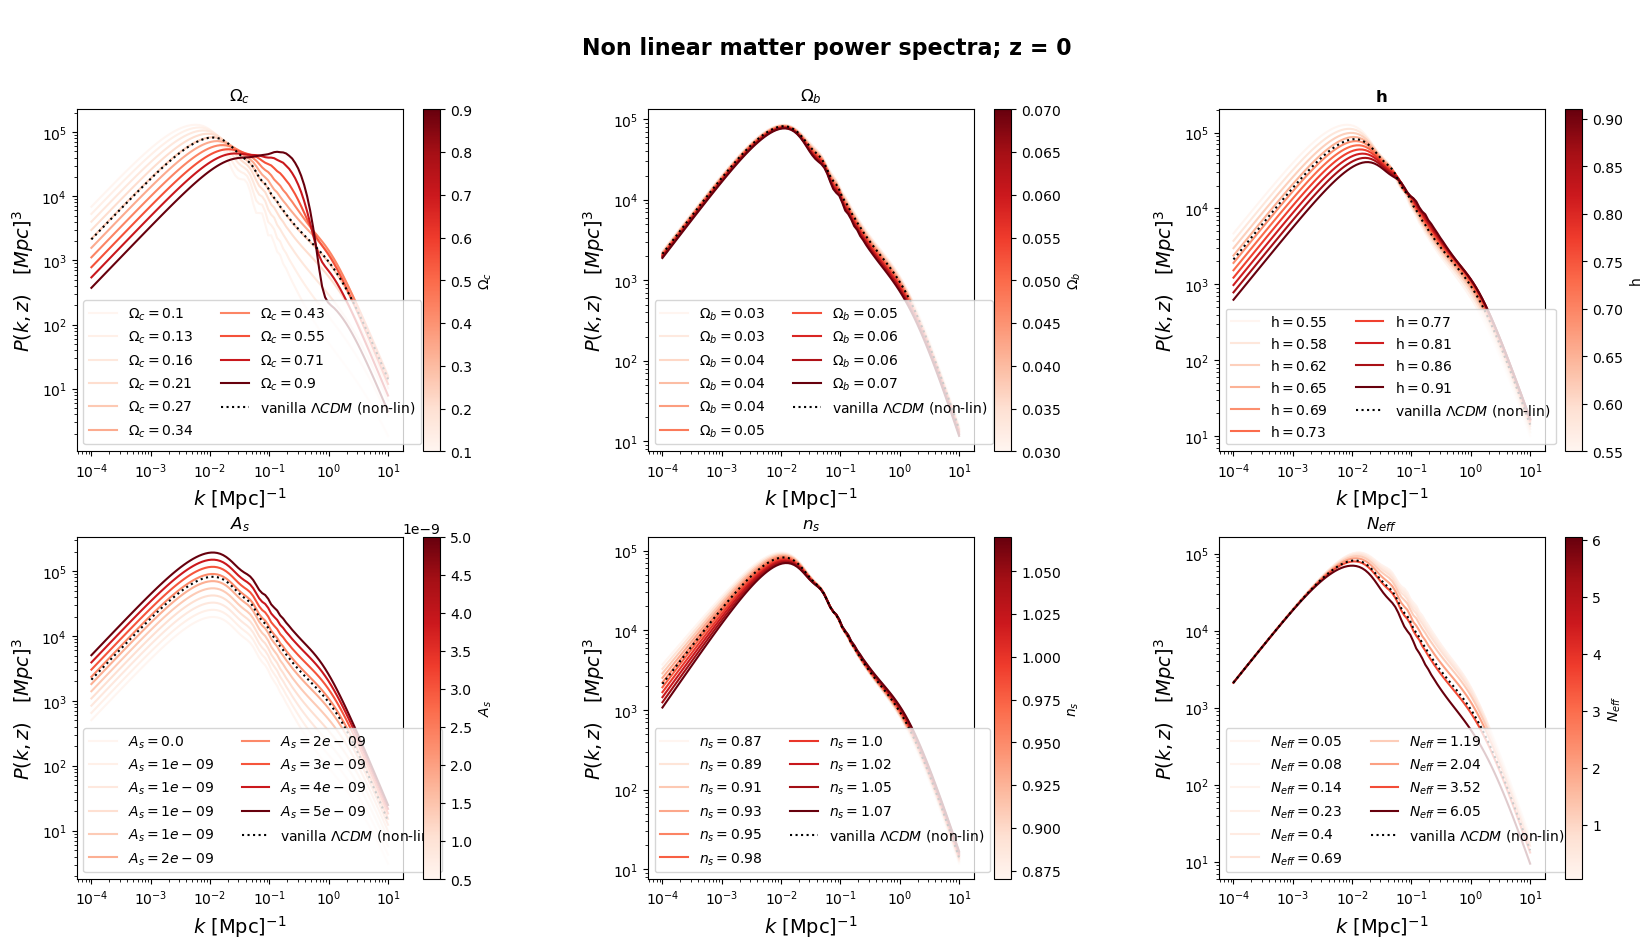

In [16]:
# To be able to change the scalefactor, redefine it here again:
a = 1 # scale factor

# Non linear vanilla LCDM:
nonlin_vanilla_lcdm = ccl.nonlin_matter_power(cosmology, k, a)

# Now we generate all the variations:
var_om_c_non_lin = loop_comso_non_lin(om_c_prior, r"Omega_c")
var_om_b_non_lin = loop_comso_non_lin(om_b_prior, r"Omega_b")
var_h_non_lin = loop_comso_non_lin(h_prior, r"h")
var_a_s_non_lin = loop_comso_non_lin(a_s_prior, r"A_s")
var_n_s_non_lin = loop_comso_non_lin(n_s_prior, r"n_s")
var_n_non_eff = loop_comso_non_lin(n_eff_prior, r"Neff")

# Similar to the priors, put all the power spectra in a list:
non_lin_P_k = (var_om_c_non_lin, var_om_b_non_lin, var_h_non_lin, var_a_s_non_lin, var_n_s_non_lin, var_n_non_eff)

# Initiate the plot:
fig, axes = plt.subplots(figsize=(20, 10), nrows=2, ncols=3)
fig.suptitle("\nNon linear matter power spectra; z = 0", weight="bold", fontsize=16)
plt.subplots_adjust(hspace=0.25, wspace=0.4)

# Add colormap and plot all graphs in color red, disticted by the saturation of the color
cmap = cm.get_cmap('Reds')

# Now we want to write a loop that plots all the varations to the linear power spectrum of a single parameter into a subplot.
for j in range(0, 3):
    # Define the range of the colors in the plot
    norm_row1 = mcolors.Normalize(vmin=min(priors[j]), vmax=max(priors[j]))
    norm_row2 = mcolors.Normalize(vmin=min(priors[j + 3]), vmax=max(priors[j + 3]))
    for i in range(len(priors[0])):

        # Make a ScalarMappable for the colorbar
        color_row1 = cmap(norm_row1(priors[j][i]))
        sm_row1 = cm.ScalarMappable(cmap=cmap, norm=norm_row1)
        sm_row1.set_array([])  # To avoid errors
        
        # Split the subplots per row, the first row for j = 0, 1, 2
        # First row:
        axes[0, j].loglog(k, non_lin_P_k[j][i], color=color_row1, label=keys[j] + r"$= {}$".format(np.round(priors[j][i], 2)))
        
        # Add titles, labels:
        axes[0, j].set_title(keys[j], weight="bold")
        axes[0, j].set_xlabel(r'$k$ [Mpc]$^{-1}$', fontsize=14)
        axes[0, j].set_ylabel(r'$P(k, z)\quad [Mpc]^{3}$', fontsize=14)
        
        # Second row:
        # Set up the colors:
        color_row2 = cmap(norm_row2(priors[j + 3][i]))
        sm_row2 = cm.ScalarMappable(cmap=cmap, norm=norm_row2)
        sm_row2.set_array([])  # To avoid errors

        axes[1, j].loglog(k, non_lin_P_k[j + 3][i], color=color_row2,
                          label=keys[j + 3] + (r"$= {}$".format(np.round(priors[j + 3][i], 9)) if j==0 else r"$= {}$".format(np.round(priors[j + 3][i], 2))))
        
        # Add titles, labels:
        axes[1, j].set_title(keys[j + 3], weight="bold")
        axes[1, j].set_xlabel(r'$k$ [Mpc]$^{-1}$', fontsize=14)
        axes[1, j].set_ylabel(r'$P(k, z) \quad [Mpc]^{3}$', fontsize=14)
    
    # Add colorbar to the subplots in row 1 & 2 respectively:
    cbar_row1 = fig.colorbar(sm_row1, ax=axes[0, j], label=keys[j])
    cbar_row2 = fig.colorbar(sm_row2, ax=axes[1, j], label=keys[j + 3])

    # Plot the reference value for "vanilla-LCDM" and the legend himself:
    axes[0, j].loglog(k, nonlin_vanilla_lcdm, ":", color='k', label=r"vanilla $\Lambda CDM$ (non-lin)")
    axes[0, j].legend(loc=0, ncols=2)
    axes[1, j].loglog(k, nonlin_vanilla_lcdm, ":", color='k', label=r"vanilla $\Lambda CDM$ (non-lin)")
    axes[1, j].legend(loc=0, ncols=2)

plt.show()

### Interpretation
**[$\todo{possibly elaborate on the findings in the non-linear matter power spectrum}$]()**

From the same analysis on the non-linear matter power spectrum we find mostly the same results as for the linear matter power spectrum. In some cases there are some unpredictable effects in the non-linear regime, or the baryon acoustic oscillations in the plot for the change in $\Omega_{c}$

In plotting the non-linear matter power spectrum for an extremely large redshift ($z=1100$), the non-linear behavior vanishes and the non-linear matter power spectrum seems to be similar to the linear matter power spectrum.

This can be explained by the following:
Non-linearities originate from gravitational collapse, which occurs mainly in between the redshifts 1100 and 0; as the large scale structure is formed from the anisotropies of the CMB.

# Neutrinos; Power spectrum, neutrino masses
Next up, we will take a look at the fraction of the matter power spectrum with non-zero neutrino mass over the matter power spectrum with a zero neutrino mass. Let us plot this for different neutrino masses too.

In [5]:
# To check the applied/implied hierarchy of neutrinos, we define a vanilla LCDM cosmology and print the Neutrino masses for different mass_splits
neutrino_cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96, m_nu=0.333)
neutrino_cosmo_split = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96, m_nu=0.333, mass_split='normal')

print("The mass distribution/mass oredering of the neutrinos without specifying the parameter 'mass_split':\n", neutrino_cosmo["m_nu"], 
      "\n \nThe mass ordering of the neutrinos for the same sum of neutrino masses 'm_nu', but now with specifying the normal hierarchy: \n", neutrino_cosmo_split["m_nu"],
      "\n \nSo are they the same? --->", neutrino_cosmo_split["m_nu"] == neutrino_cosmo["m_nu"])


The mass distribution/mass oredering of the neutrinos without specifying the parameter 'mass_split':
 [0.10711276514624718, 0.10746787639710376, 0.11841935845664912] 
 
The mass ordering of the neutrinos for the same sum of neutrino masses 'm_nu', but now with specifying the normal hierarchy: 
 [0.10711276514624718, 0.10746787639710376, 0.11841935845664912] 
 
So are they the same? ---> True



## Neutrino masses; normal hierarchy:
First off, we visualize the effect of the neutrino masses by specifying only the sum of neutrino masses and varying this total sum. This implies that the neutrino masses are distributed over the species according to the normal hierarchy **[$\todo{Refer to section on neutrinos}$]()**.
The range within which we vary the mass is (0, 1) eV; as found in the DES paper mentioned above. [[Abbott, T. M. C., Acevedo, M., Adamow, M., Aguena, M., Alarcon, A., Allam, S., ... & DES Collaboration. (2025). Dark Energy Survey: implications for cosmological expansion models from the final DES Baryon Acoustic Oscillation and Supernova data. arXiv preprint arXiv:2503.06712.](https://arxiv.org/pdf/2503.06712); given the priors of *Table I* ]

However, the current constraints tell us that the sum of neutrino masses should be within the range (0.06, 0.22) eV. Let us at first consider the range according to the prior of the DES paper, just so we can visualize the effect more significantly. Later on we will turn to the more accurate constraints.

We will plot the fraction of the linear matter power spectrum including varyous values for the sum of neutrion masses over the linear matter power spectrum with no massive neutrinos $\left(\sum_{i} m_{\nu, i} = 0\right)$.

/var/folders/lk/qr_shnj17csc45hj2xy2j2rh0000gn/T/ipykernel_4877/2690502301.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


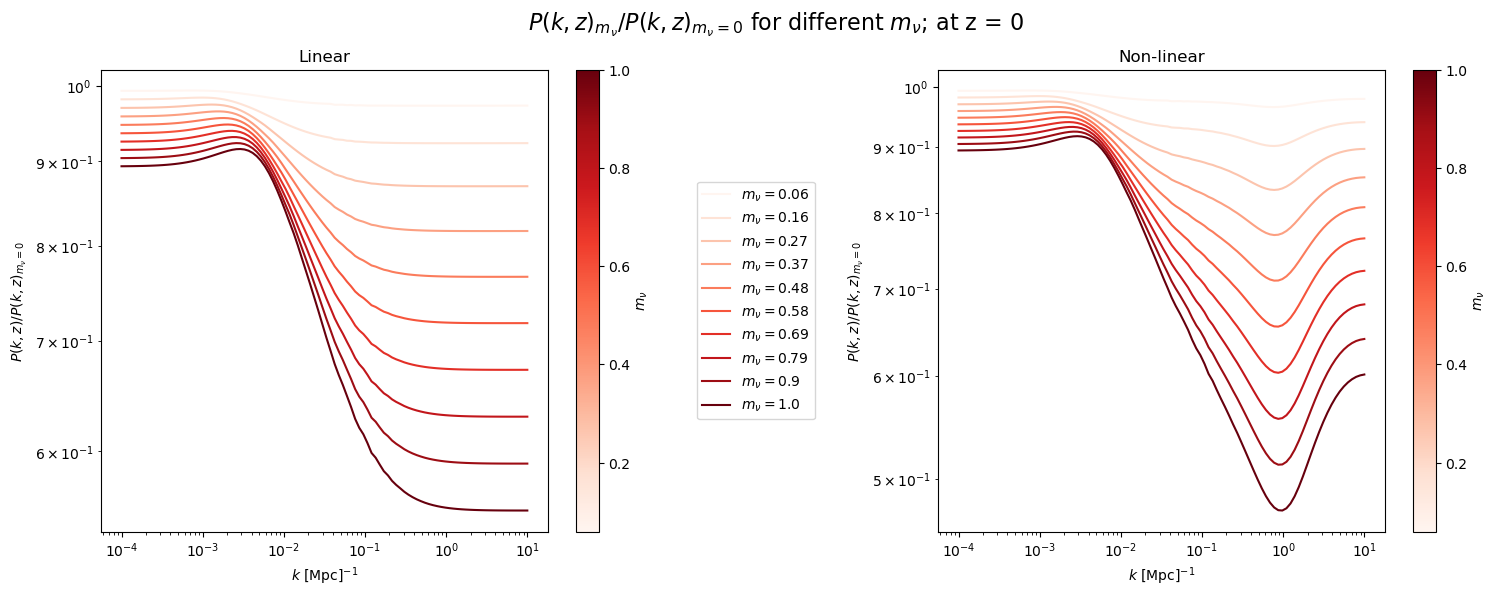

In [6]:
# First we define the prior on the neutrino masses:
m_nu_prior = np.linspace(0.06, 1, 10) # in the priors from DES we find the use of (0, 1) in eV, since we purposefully plot P(k, z) for m_nu = 0, we exclude 0 from the prior

# For local control of the redshift: 
a = 1

# Define the linear and non-linear power spectra:
m_nu_lin = loop_comso_lin(m_nu_prior, r"m_nu")
m_nu_0_lin = loop_comso_lin([0], r"m_nu")
m_nu_non_lin = loop_comso_non_lin(m_nu_prior, r"m_nu")
m_nu_0_non_lin = loop_comso_non_lin([0], r"m_nu")

# In one list, to make the loop for plotting easier:
p_k_nu = [m_nu_lin, m_nu_non_lin]
p_k_nu_0 = [m_nu_0_lin, m_nu_0_non_lin]
titles = ["Linear", "Non-linear"]

# Initiate the plot:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=2)
fig.suptitle(r"$P(k, z)_{m_{\nu}}/P(k, z)_{m_{\nu}=0}$ for different $m_{\nu}$; at z = 0", fontsize=16)
fig.subplots_adjust(wspace=0.5)

# Add colormap and plot all graphs in color red, disticted by the saturation of the color
cmap = cm.get_cmap('Reds')

# Now we want to write a loop that plots all the varations to the linear power spectrum of a single parameter into a subplot.
for j in range(0, 2):
    # Define the range of the colors in the plot
    norm = mcolors.Normalize(vmin=min(m_nu_prior), vmax=max(m_nu_prior))
    for i in range(len(m_nu_prior)):

        # Make a ScalarMappable for the colorbar
        color = cmap(norm(m_nu_prior[i]))
        sm = cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # To avoid errors
        
        # Split the subplots per row, the first row for j = 0, 1, 2
        # First row:
        axes[j].loglog(k, p_k_nu[j][i]/(p_k_nu_0[j][0]), color=color, label=r"$m_{\nu}$" + r"$= {}$".format(np.round(m_nu_prior[i], 2)))
        
        # Add titles, labels:
        axes[j].set_title(titles[j])
        axes[j].set_xlabel(r'$k$ [Mpc]$^{-1}$')
        axes[j].set_ylabel(r'$P(k, z)/P(k, z)_{m_\nu=0}$')
    
    # Add colorbar to the subplots in row 1 & 2 respectively:
    cbar = fig.colorbar(sm, ax=axes[j], label=r"$m_{\nu}$")

    # Plot the legend himself:
    axes[0].legend(loc='center right', bbox_to_anchor=(1.615, 0.5),
          ncol=1, fancybox=True)

plt.show()

### Interpretation of the neutrino mass effect
Looking at the plot of the linear matter power spectrum: **[sec 4.2; disregard non-linear scales due to significant uncertainties](https://arxiv.org/abs/1712.07109)**

Note that the matter power spectrum is suppressed on all scales after an increase in the neutrino masses. This effect is most significant on smallest scales. In this regime, the neutrinos suppress clustering of matter due to their velocity dispersion, in combination with the fact that massive neutrinos interact with both CDM and baryons through gravity. Because of the large velocities of the neutrinos, passing through the baryon-photon plasma, the neutrinos distort the gravitational collapse of the fluctuations of the baryon density **[TODO: Baryons only collapse gravitationally after last scattering?]()** and the CDM and thus "counteracts the clustering" of these fluctuations. This is called neutrino drag. The suppression of clustering results in a decrease in the matter power spectrum, expecially on small scales. The fluctuations of theses scales interacted with neutrinos before they decoupled from the baryonic plasma. In this regime the effect of neutrinos is therefore more significant, rather than the regime of large scale modes. In the latter, the neutrinos were decoupled from the baryonic plasma and only very weakly interacted with the other components of the universe, leading to a small effect of the change in neutrino mass on these scaled. **[$\todo{Free streaming length? }$]()** **[Look at this, sect. 4.2: Relate to the neutrino fraction $f_{\nu} = \frac{\Omega_{\nu}}{\Omega_{m}}$ and the radiation-matter fraction](https://arxiv.org/abs/1712.07109)**

**Note:** the behavior of the non-linear matter power spectrum fraction for the smallest scales is the exact reason why this regime is commonly cutt-off.


## 1 ultra relatvistic neutrino species, and two massive neutrinos:
To allow a better first analysis and visualization of the effect of the sum of neutrino masses on the matter power spectrum, apply the DES priors to the non-zero neutrino masses. Otherwise we make the same plot, but this time we set one of the neutrino masses to zero, such that we have one ultra relativistic species. In doing so, we devide the sum of neutrino masses equally over the other neutrino species.

/var/folders/lk/qr_shnj17csc45hj2xy2j2rh0000gn/T/ipykernel_4877/4149588773.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_blue = cm.get_cmap('Blues')


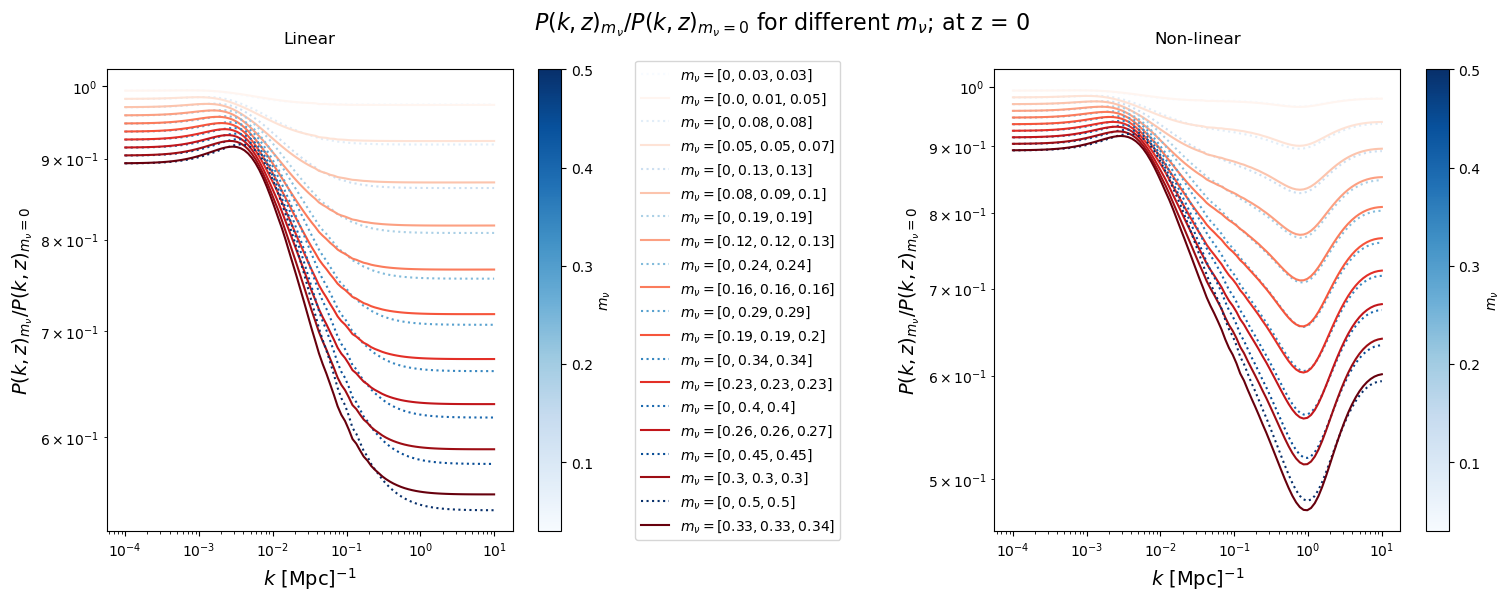

In [7]:
# Because we now consider 1 massless neutrino, we devide the sum of the neutrino masses over the non relativistic species; thus devide the prior by 2;
list_m_nu_prior = np.linspace(0.03, 0.5, 10) # in the priors from DES we find the use of (0, 1) in eV, since we purposefully plot P(k, z) for m_nu = 0, we exclude 0 from the prior

# For local control of the redshift: 
a = 1

# Define the linear and non-linear power spectra, with an ultra relativistic neutrino:
list_m_nu_lin = loop_comso_lin(list_m_nu_prior, r"m_nu", [0, 0.25, 0.25], mass_split="normal") # We can re-use the power spectra from the following cell
list_m_nu_non_lin = loop_comso_non_lin(list_m_nu_prior, r"m_nu", [0, 0.25, 0.25], mass_split="normal")

# In one list, to make the loop for plotting easier:
p_k_nu_list = [list_m_nu_lin, list_m_nu_non_lin]

# Initiate the plot:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=2)
fig.suptitle(r"$P(k, z)_{m_{\nu}}/P(k, z)_{m_{\nu}=0}$ for different $m_{\nu}$; at z = 0", fontsize=16)
fig.subplots_adjust(wspace=0.75)

# Add colormap and plot all graphs in color red, disticted by the saturation of the color
cmap_blue = cm.get_cmap('Blues')

# Now we want to write a loop that plots all the varations to the linear power spectrum of a single parameter into a subplot.
for j in range(0, 2):
    # Define the range of the colors in the plot
    norm_blue = mcolors.Normalize(vmin=min(list_m_nu_prior), vmax=max(list_m_nu_prior))
    norm = mcolors.Normalize(vmin=min(m_nu_prior), vmax=max(m_nu_prior))
    for i in range(len(list_m_nu_prior)):

        # For comparison of individual neutrino masses, obtain the parameter 'm_nu' for the case of 3 massive neutrinos:
        m_nu_i = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96, m_nu=m_nu_prior[i])

        # Make a ScalarMappable for the colorbar
        color_blue = cmap_blue(norm_blue(list_m_nu_prior[i]))
        sm_blue = cm.ScalarMappable(cmap=cmap_blue, norm=norm_blue)
        sm_blue.set_array([])  # To avoid errors
        color = cmap(norm(m_nu_prior[i]))
        
        # Subplot:
        axes[j].loglog(k, p_k_nu_list[j][i]/(p_k_nu_0[j][0]), color=color_blue, linestyle='dotted', 
                       label=r"$m_{\nu}$" + r"$= [0, {}, {}]$".format(np.round(list_m_nu_prior[i], 2), np.round(list_m_nu_prior[i], 2)))
        axes[j].loglog(k, p_k_nu[j][i]/(p_k_nu_0[j][0]), color=color, label=r"$m_{\nu}$" + r"$= [{}, {}, {}]$".format(np.round(m_nu_i["m_nu"][0], 2), 
                                                                                                                      np.round(m_nu_i["m_nu"][1], 2), np.round(m_nu_i["m_nu"][2], 2)))

        # Add titles, labels:
        axes[j].set_title(titles[j] + "\n")
        axes[j].set_xlabel(r'$k$ [Mpc]$^{-1}$', fontsize=14)
        axes[j].set_ylabel(r'$P(k, z)_{m_{\nu}}/P(k, z)_{m_{\nu}=0}$', fontsize=14)
    
    # Add colorbar to the subplots in row 1 & 2 respectively:
    cbar = fig.colorbar(sm_blue, ax=axes[j], label=r"$m_{\nu}$")

    # Plot the legend himself:
    axes[0].legend(loc='center right', bbox_to_anchor=(1.825, 0.5),
          ncol=1, fancybox=True)

plt.show()

### Interpretation:
Instead of varying the sum of neutrino massses and distributing this total mass according to the normal hierarchy, we now consider the case where we always g=have one relativistic species of neutrinos with $m_{\nu, rel} = 0$ and we devide the similar total mass over the two non-relativistic species of neutrinos. Effectively, instead of the 3 lighter non-relativistic neutrinos, we now have 2 heavier non-relativistic neutrinos.

We see a notable difference in comparison with the situation from before:
- sped up drag; corresponding to the shift of radiation-matter eqaulity (that should not change, since the sum of neutrino masses is equal in both cases...)
- increased drag

---> change in the radiation/matter/CDM budget etc


By setting one neutrino mass to zero and spreading the total neutrino masses over the two massive species, we increase the mass of the individual massive neutrinos relatively. The massive neutrinos indivudually have a larger effect on the power spectrum bu generating more drag. 

# Find a way to plot the effect of $N_{eff}$; indirectly $\sum m_{\nu}$
- Neutrinos cluster over longer scales(due to their mass?), this causes a suppression of the growth of structure. **Thus** we can plot the growth over scales for different neutrino masses?
- plot the change of $N_{eff}$ together with a change in $H_{0}$ for P(k)

/var/folders/lk/qr_shnj17csc45hj2xy2j2rh0000gn/T/ipykernel_4877/902009075.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


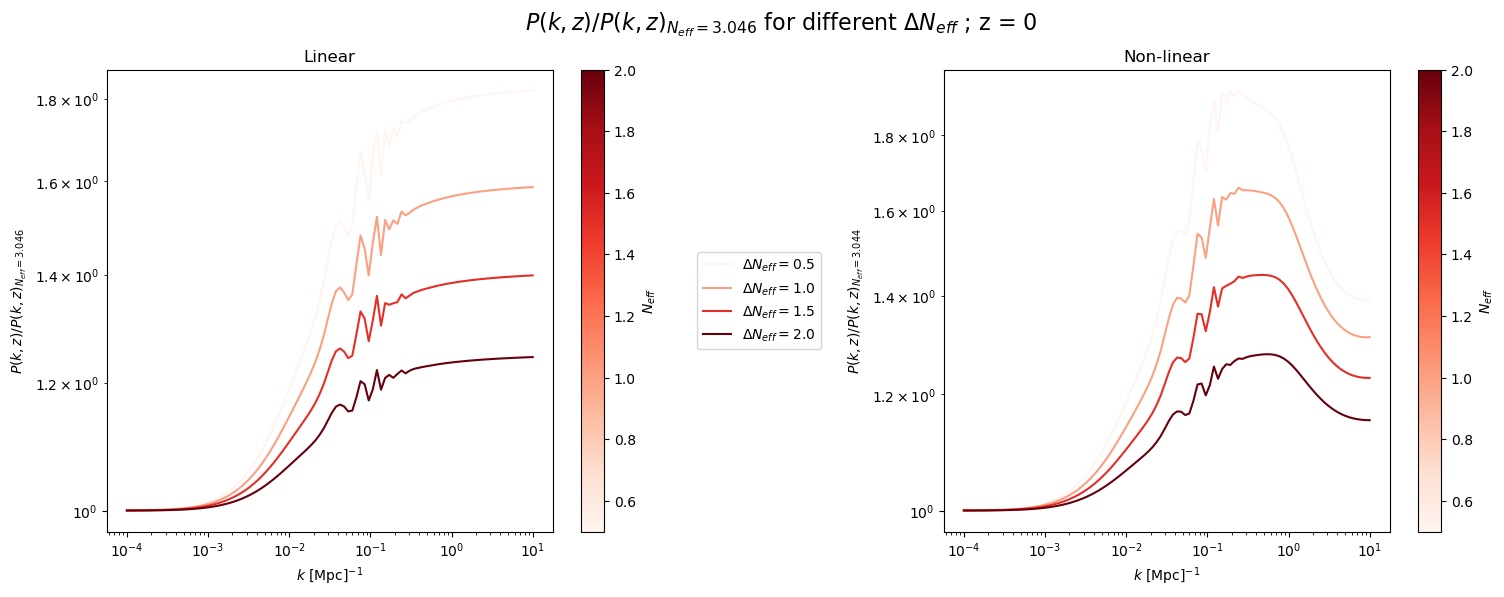

In [ ]:
# Using the priors for N_eff we defined above, and for local control of the redshift: 
prior_n_eff = np.linspace(3.546, 5.046, 4)
a = 1

# TODO: Add a change in the Hubble rate psimultaneous with the change in Neff:
#h_prior = h_prior * 2

# Define the linear and non-linear power spectra:
n_eff_lin = loop_comso_lin((n_eff_prior - 3.046), r"Neff")
n_eff_non_lin = loop_comso_non_lin((n_eff_prior - 3.046), r"Neff")

# Define both the linear and non-linear matter power spectra for Neff = 3.046
n_eff0_cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96, Neff=3.046)
n_eff0_lin = ccl.linear_matter_power(n_eff0_cosmo, k, a)
n_eff0_non_lin = ccl.nonlin_matter_power(n_eff0_cosmo, k, a)

# Initiate the plot:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=2)
fig.suptitle(r"$P(k, z)/P(k, z)_{N_{eff}=3.046}$ for different $\Delta N_{eff}$ ; z = 0", fontsize=16)
fig.subplots_adjust(wspace=0.5)

# Add colormap and plot all graphs in color red, disticted by the saturation of the color
cmap = cm.get_cmap('Reds')

# Now we want to write a loop that plots all the varations to the linear power spectrum of a single parameter into a subplot.

# Define the range of the colors in the plot
norm = mcolors.Normalize(vmin=min(n_eff_prior - 3.046), vmax=max(n_eff_prior - 3.046))
for i in range(len(n_eff_prior)):

    # Make a ScalarMappable for the colorbar
    color = cmap(norm(n_eff_prior[i] - 3.046))
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # To avoid errors
        
    # Split the subplots per row, the first row for j = 0, 1, 2
    # First row:
    axes[0].loglog(k, n_eff_lin[i]/n_eff0_lin, color=color, label=r"$\Delta N_{eff}$" + r"$= {}$".format(np.round((n_eff_prior[i] - 3.046), 3)))
    #axes[0].loglog(k, vanilla_lcdm/vanilla_lcdm, color="k")
    
    # Add titles, labels:
    axes[0].set_title("Linear")
    axes[0].set_xlabel(r'$k$ [Mpc]$^{-1}$')
    axes[0].set_ylabel(r'$P(k, z)/P(k, z)_{N_{eff}=3.046}$')
    
    # Second plot
    axes[1].loglog(k, n_eff_non_lin[i]/n_eff0_non_lin, color=color)
    #axes[1].loglog(k, vanilla_lcdm/vanilla_lcdm, color="k")
    
    # Add titles, labels:
    axes[1].set_title("Non-linear")
    axes[1].set_xlabel(r'$k$ [Mpc]$^{-1}$')
    axes[1].set_ylabel(r'$P(k, z)/P(k, z)_{N_{eff}=3.044}$')
    
# Add colorbar to the subplots in row 1 & 2 respectively:
cbar = fig.colorbar(sm, ax=axes[0], label=r"$N_{eff}$")
cbar = fig.colorbar(sm, ax=axes[1], label=r"$N_{eff}$")

# Plot the legend himself:
axes[0].legend(loc='center right', bbox_to_anchor=(1.615, 0.5),
      ncol=1, fancybox=True)

plt.show()

In [9]:
cosmology = ccl.Cosmology(Omega_c=0.27, Omega_b=0.15, h=0.67, A_s=2.1e-9, n_s=0.96) # , transfer_function='boltzmann_class') # , transfer_function="eisenstein_hu")

g = cosmology.compute_growth()

print(g)

None
